# <center>Zombie Attack!</center>
<center><div>
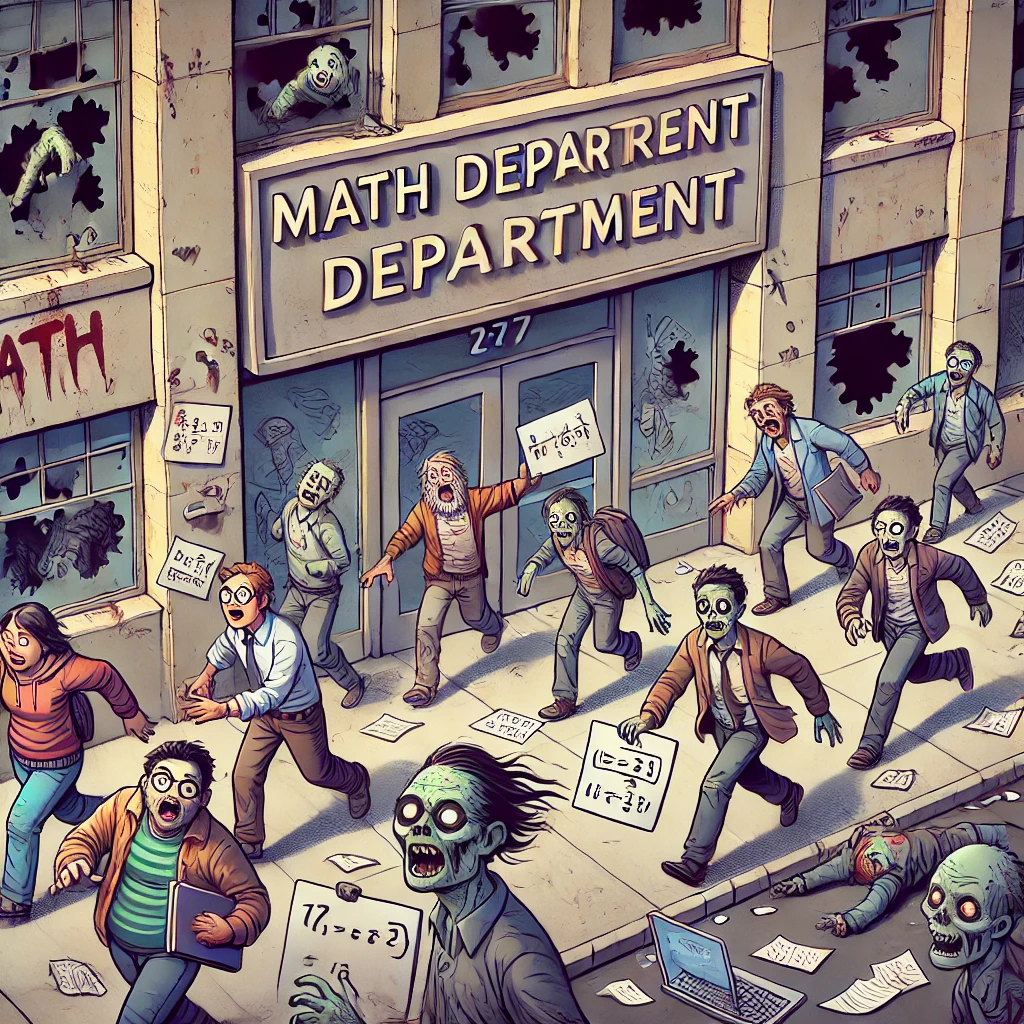
</div></center>

---

Notebook made by *Rodolfo G Blanco Rodriguez*

Based on the book's chapter: Munz, Philip, et al. *When zombies attack!: mathematical modelling of an outbreak of zombie infection.* Infectious disease modelling research progress 4 (2009): 133-150.

---

## Introduction

A zombie is a reanimated human corpse that feeds on living human flesh. Stories about zombies originated in the Afro-Caribbean spiritual belief system of Vodou. The first movie about zombies was White Zombie (1930), but the walking dead became popular in modern horror fiction with the film Night of the Living Dead. After this movie, a lot of several movies, series, videogames and more about zombies have been made, ranging from horror, suspense, comedy and even romance.

<center><div>
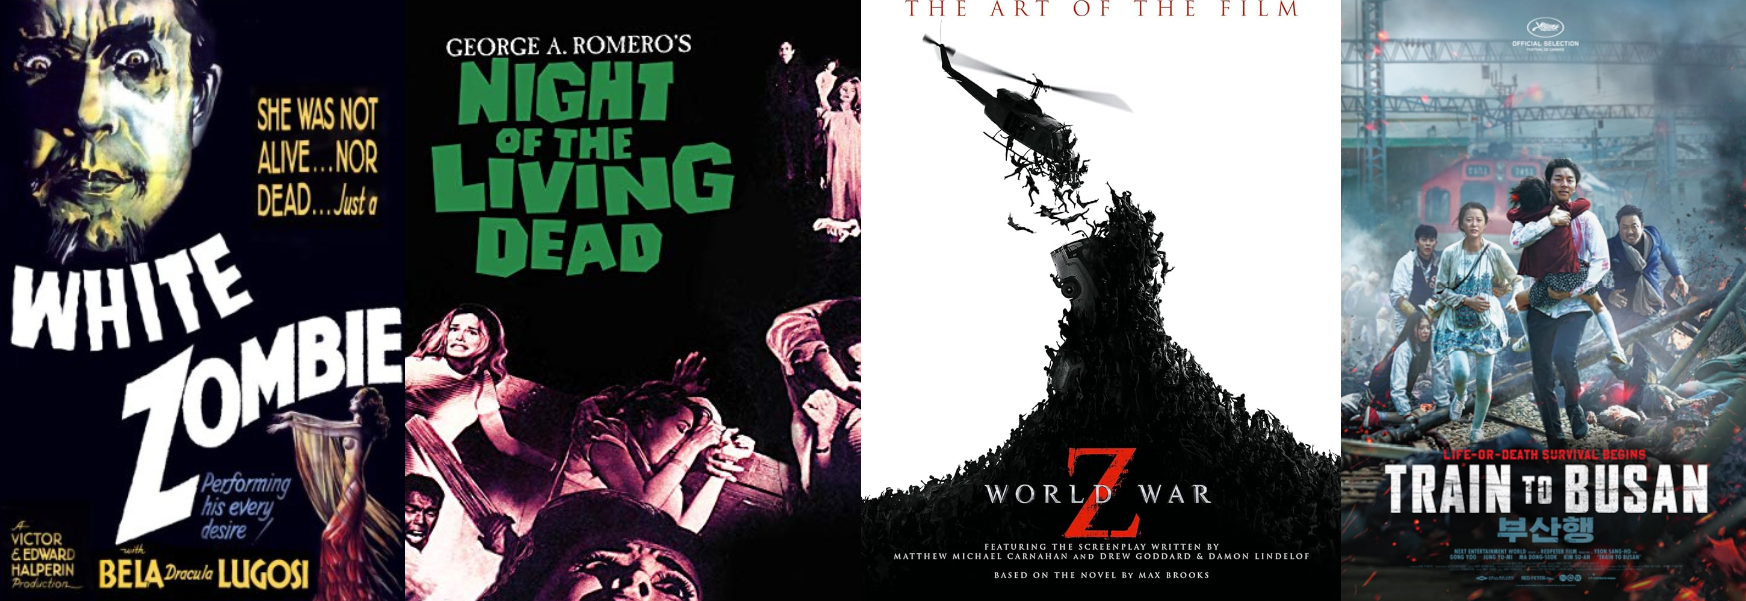
</div></center>

The premise of the zombie is that when a susceptible individual is bitten by a zombie, it leaves an open wound. The wound created by the zombie has the zombie's saliva in and around it. This bodily fluid mixes with the blood and infects the (previously susceptible) individual.
<center><div>
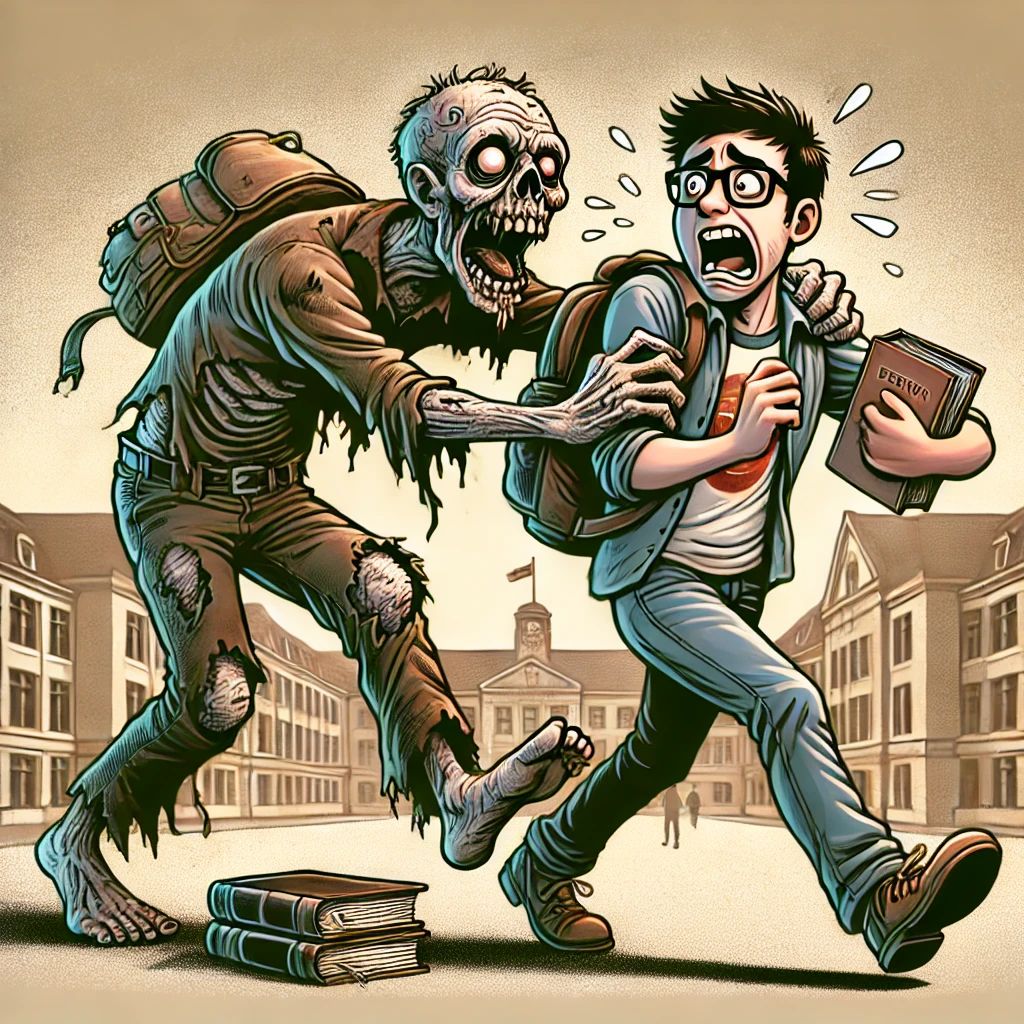
</div></center>

## 1. Basic model $SZR$

For the basic model, we consider three basic classes:
- Susceptible ($S$).
- Zombie ($Z$).
- Removed ($R$).

Only humans can become infected through contact with zombies, and zombies only have a craving for human flesh so we do not consider any other life forms in the model. New zombies can only come from two sources:
- The resurrected from the newly deceased (removed group).
- Susceptibles who have ‘lost’ an encounter with a zombie.

The basic model is given by:
\begin{eqnarray}
\dot S &=& \Pi -\beta SZ -\delta S \\
\dot Z &=& \beta SZ + \zeta R  - \alpha SZ \\
\dot R &=& \delta S + \alpha SZ - \zeta R
\end{eqnarray}

<center><div>
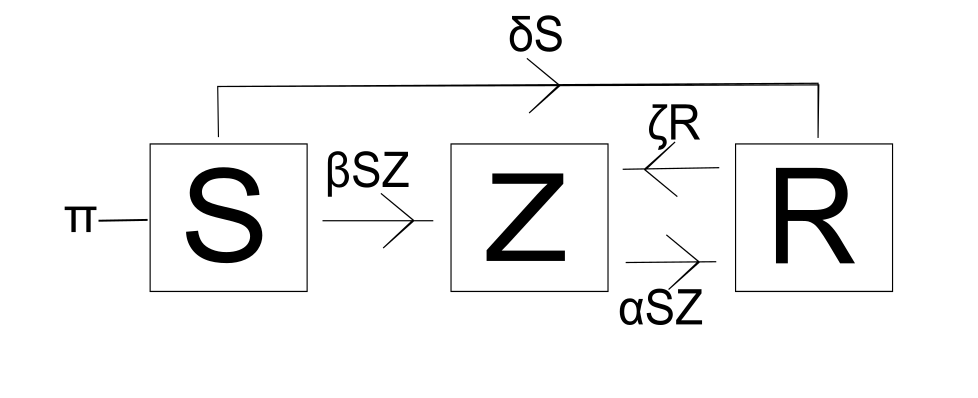
</div></center>

The ODE satisfy $\dot S + \dot Z + \dot R = \Pi$, and hence $S + Z + R \to \infty$ as $t \to \infty$, if $\Pi \neq 0$. If we assume that the outbreak happens over a short timescale, then we can ignore birth and background death rates. Thus, we set $\Pi = \delta = 0$.

### Outbreak simulation

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

**Model:**

In [2]:
def f1(y, t, pi, delta, beta, zeta, alpha):
    S, Z, R = y

    dS = pi - beta*S*Z - delta*S
    dZ = beta*S*Z + zeta*R - alpha*S*Z
    dR = delta*S + alpha*S*Z - zeta*R
    
    return [dS, dZ, dR]

**Parameters:**

In [8]:
pi = 0         # birth rate
delta = 0.0 # natural death percent (per day)
beta = 0.01  # transmission percent  (per day)
zeta = 0.0001  # resurect percent (per day)
alpha = 0.005 # destroy percent  (per day)

**Simulation:**

In [9]:
# Initial conditions
S0 = 500
Z0 = 1
R0 = 0
zombified
y0 = [S0, Z0, R0]
t = np.linspace(0, 25, 1000)

In [10]:
sol = odeint(f1, y0, t, args=(pi, delta, beta, zeta, alpha))

In [11]:
# Get S(t), Z(t), and R(t)
S = sol[:,0]
Z = sol[:,1]
R = sol[:,2]

Plot:

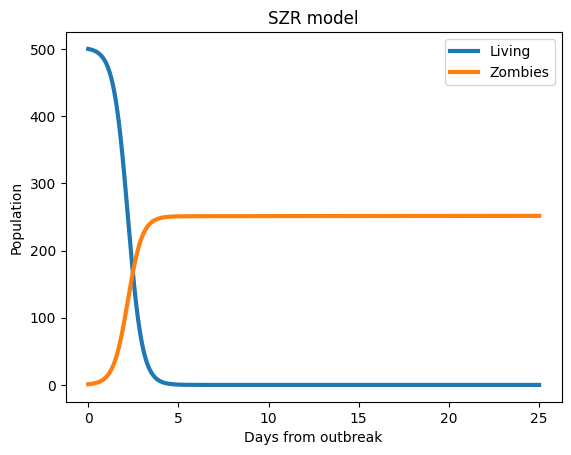

In [12]:
plt.figure()
plt.plot(t, S, label='Living', lw = 3)
plt.plot(t, Z, label='Zombies', lw = 3)
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('SZR model')
plt.legend(loc=0)
plt.show()

## 2. Model with Latent Infection $SIZR$

We now revise the model to include a latent class of infected individuals. There is a period of time (approximately 24 hours) after the human susceptible gets bitten before they succumb to their wound and become a zombie. We thus extend the basic model to include the (more ‘realistic’) possibility that a susceptible individual becomes infected before succumbing to zombification.

Changes to the basic model include:
- Susceptibles first move to an infected class once infected and remain there for some period of time.
- Infected individuals can still die a *natural* death before becoming a zombie; otherwise, they become a zombie.

The model is given by:
\begin{eqnarray}
\dot S &=& \Pi -\beta SZ -\delta S \\
\dot I &=& \beta SZ - \rho I  - \delta I \\
\dot Z &=& \rho I + \zeta R  - \alpha SZ \\
\dot R &=& \delta S + \delta I + \alpha SZ - \zeta R
\end{eqnarray}

<center><div>
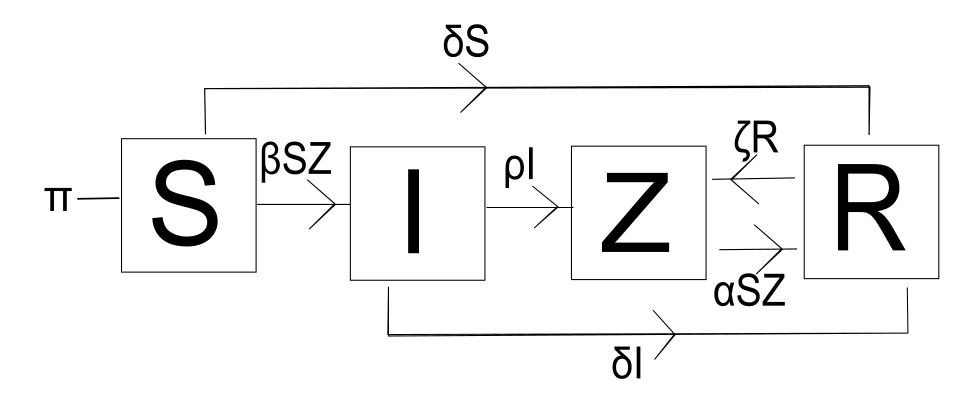
</div></center>

### Outbreak simulation

In [25]:
def f2(y, t, pi, delta, beta, rho, zeta, alpha):
    S, I, Z, R = y

    dS = pi - beta*S*Z - delta*S
    dI = beta*S*Z - rho*I - delta*I
    dZ = rho*I + zeta*R - alpha*S*Z
    dR = delta*S + delta*I + alpha*S*Z - zeta*R
    
    return [dS, dI, dZ, dR]

In [26]:
pi = 0         # birth rate
delta = 0.000 # natural death percent (per day)
beta = 0.01  # transmission percent  (per day)
rho = 0.05   # conversion percent (per day)
zeta = 0.0001  # resurect percent (per day)
alpha = 0.0001 # destroy percent  (per day)

In [27]:
# Initial conditions
S0 = 500
I0 = 0
Z0 = 1
R0 = 0

y0 = [S0, I0, Z0, R0]
t = np.linspace(0, 50, 1000)

In [28]:
sol = odeint(f2, y0, t, args=(pi, delta, beta, rho, zeta, alpha))

In [29]:
S = sol[:,0]
I = sol[:,1]
Z = sol[:,2]
R = sol[:,3]

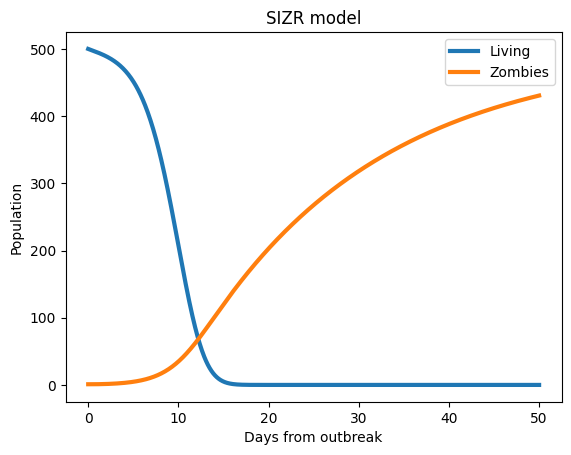

In [30]:
plt.figure()
plt.plot(t, S, label='Living', lw = 3)
plt.plot(t, Z, label='Zombies', lw = 3)
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('SIZR model')
plt.legend(loc=0)
plt.show()

## 3. Model with treatment

Suppose we are able to quickly produce a cure for ‘zombie-ism’. Our treatment would be able to allow the zombie individual to return to their human form again. Once human, however, the new human would again be susceptible to becoming a zombie; thus, our cure does not provide immunity.

Things that need to be considered now include:
- Since we have treatment, we no longer need the quarantine.
- The cure will allow zombies to return to their original human form regardless of how they became zombies in the first place.
- Any cured zombies become susceptible again; the cure does not provide immunity.

The model is given by:
\begin{eqnarray}
\dot S &=& \Pi -\beta SZ -\delta S + cZ\\
\dot I &=& \beta SZ - \rho I  - \delta I \\
\dot Z &=& \rho I + \zeta R  - \alpha SZ - cZ\\
\dot R &=& \delta S + \delta I + \alpha SZ - \zeta R
\end{eqnarray}

<center><div>
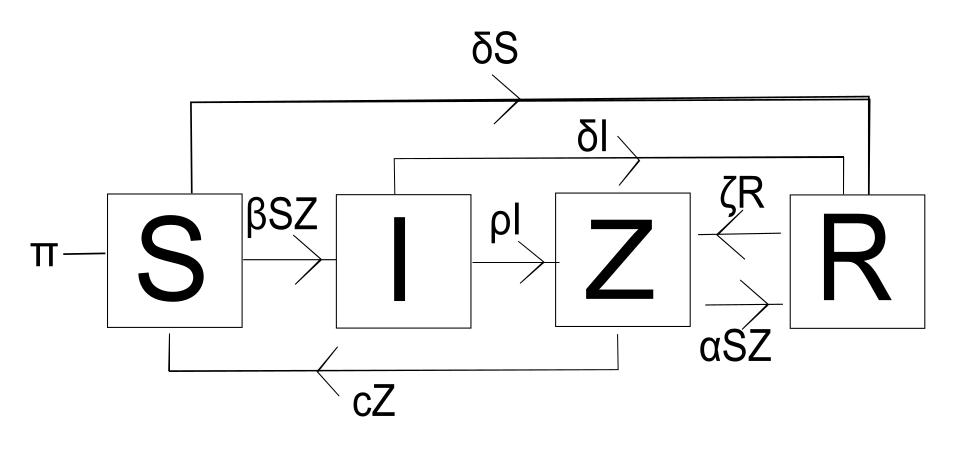
</div></center>

### Outbreak simulation

In [31]:
def f3(y, t, pi, delta, beta, c, rho, zeta, alpha):
    S, I, Z, R = y

    dS = pi - beta*S*Z - delta*S + c*Z
    dI = beta*S*Z - rho*I - delta*I
    dZ = rho*I + zeta*R - alpha*S*Z - c*Z
    dR = delta*S + delta*I + alpha*S*Z - zeta*R
    
    return [dS, dI, dZ, dR]

In [32]:
pi = 0         # birth rate
delta = 0.000 # natural death percent (per day)
beta = 0.01    # transmission percent  (per day)
c = 0.01     # curation percent (per day)
rho = 0.05     # conversion percent (per day)
zeta = 0.0001  # resurect percent (per day)
alpha = 0.0001 # destroy percent  (per day)

In [33]:
# Initial conditions
S0 = 500
I0 = 0
Z0 = 1
R0 = 0

y0 = [S0, I0, Z0, R0]
t = np.linspace(0, 50, 1000)

In [34]:
sol = odeint(f3, y0, t, args=(pi, delta, beta, c, rho, zeta, alpha))

In [35]:
S = sol[:,0]
I = sol[:,1]
Z = sol[:,2]
R = sol[:,3]

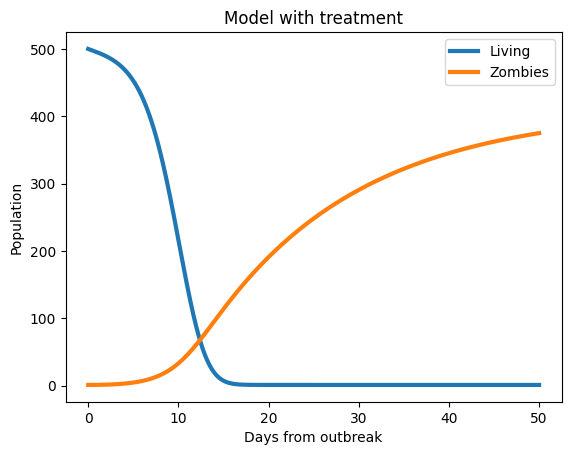

In [36]:
plt.figure()
plt.plot(t, S, label='Living', lw = 3)
plt.plot(t, Z, label='Zombies', lw = 3)
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Model with treatment')
plt.legend(loc=0)
plt.show()

# <center>"And they won't stop until you're zombified"</center>